# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

from sklearn.svm import SVC

# Loading transformed splits

In [3]:
pca_path = "../data/pca_files/"

In [4]:
X_test_transformed = np.load(pca_path+"100x100x3_X_test_transformed.npy")
X_train_transformed = np.load(pca_path+"100x100x3_X_train_transformed.npy")
y_test = np.load(pca_path+"100x100x3_y_test.npy")
y_train = np.load(pca_path+"100x100x3_y_train.npy")
print(X_train_transformed.shape,".....",y_train.shape)
print(X_test_transformed.shape,".....",y_test.shape)

(19805, 227) ..... (19805,)
(2201, 227) ..... (2201,)


# Model Imports

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate

## RandomForestClassifier --> Train 37.3% | Test 38.5%

In [65]:
accuracy = []

model = RandomForestClassifier(n_estimators = 3600, n_jobs = -1, criterion="entropy"
                                ,min_samples_split=15,min_samples_leaf=11,min_weight_fraction_leaf=0
                                ,max_depth=90,min_impurity_decrease=0
                                ,bootstrap = False
                                ,max_features = "auto",class_weight='balanced_subsample')
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
accuracy.append(accuracy_score(y_test,y_pred))

In [69]:
scores = cross_validate(model,X_train_transformed, y_train, cv=3, scoring = "accuracy")

In [72]:
scores["test_score"].mean()

0.3734406442079139

In [78]:
y_pred = model.predict(X_test_transformed)
accuracy_score(y_test,y_pred)

0.38573375738300775

## SGD --> Train: 37.97 | Test: 38.39

In [11]:
accuracy = []

#penalty=["l2","l1","elasticnet"]
#alpha = np.linspace(0.0001,5,10) --> ignore

#learning_rate = ["invscaling","optimal","constant","adaptive"]
#eta0 = np.linspace(4,10,10) -> re-test

#max_iter = [int(x) for x in np.linspace(start = 4000, stop = 4700, num = 5,dtype="int")]

#for i in max_iter:
#    print(i,"in",max_iter)

sgd = SGDClassifier(n_jobs=-1,max_iter=4200
                 ,penalty="l1",learning_rate="adaptive",eta0 = 4
                 ,loss = "hinge",fit_intercept = True)

sgd.fit(X_train_transformed, y_train)
y_pred = sgd.predict(X_test_transformed)
accuracy_score(y_test,y_pred)

0.3839164016356202

In [81]:
scores = cross_validate(model,X_train_transformed, y_train, cv=5, scoring = "accuracy")
scores["test_score"].mean()

0.3797020954304469

## ExtraTreesClassifier --> Train 39.09% || Test 41.66%

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

In [82]:
accuracy = []

# Number of trees in random forest
#min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 6, num = 4,dtype="int")]
#min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 30, num = 10,dtype="int")]

#for i in max_depth:
#    print(i,"in",max_depth)

model = ExtraTreesClassifier(verbose = 1,random_state=42, n_estimators = 1800, n_jobs = -1
                                #, criterion="entropy"
                                ,min_samples_split=3
                                ,min_samples_leaf=1
                                #,min_weight_fraction_leaf=0
                                #,min_impurity_decrease=0
                                #,bootstrap = False
                                #,max_features = "auto"
                                #,class_weight='balanced_subsample'
                              )
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
#accuracy.append(
accuracy_score(y_test,y_pred)
#)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.6min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.8s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:   28.0s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:  1.3min
[Parallel(n_job

0.41662880508859607

In [83]:
scores = cross_validate(model,X_train_transformed, y_train, cv=5, scoring = "accuracy")
scores["test_score"].mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 427 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 777 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1227 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1777 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 16.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   45.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   48.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)

0.39091138601363296

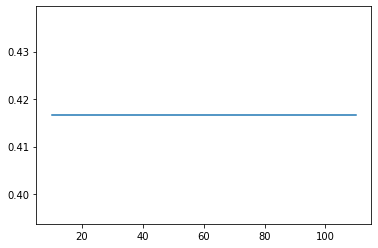

In [45]:
plt.plot(max_depth,accuracy)

## Best Single (SVC) --> 39.69%

In [87]:
accuracy = []

# SVC --> 0.42 on test_set
model = SVC(class_weight="balanced",C = 10.4
            ,cache_size=3000,verbose=10)

model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
accuracy_score(y_test,y_pred)

10.4 in [10.4, 10.6, 10.8]
[LibSVM]10.6 in [10.4, 10.6, 10.8]
[LibSVM]10.8 in [10.4, 10.6, 10.8]
[LibSVM]

In [89]:
scores = cross_validate(model,X_train_transformed, y_train, cv=3, scoring = "accuracy")
scores["test_score"].mean()

[LibSVM][LibSVM][LibSVM]

0.3969197703101084

## Stacking --> Test 46.5%

In [113]:
estimators = [
    ("RFC",RandomForestClassifier(n_estimators = 3600, criterion="entropy"
                                ,min_samples_split=15,min_samples_leaf=11,min_weight_fraction_leaf=0
                                ,max_depth=90,min_impurity_decrease=0
                                ,bootstrap = False
                                ,max_features = "auto",class_weight='balanced_subsample')),
    ( "SVC",SVC(class_weight="balanced",C = 10.4
            ,cache_size=2000,verbose=10)),
    ("ETC",ExtraTreesClassifier(verbose = 1,random_state=42, n_estimators = 1800
                                ,min_samples_split=3
                                ,min_samples_leaf=1
                                
                              ))
]

#0.45 without ETC

stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),cv=3,verbose=10)
stc.fit(X_train_transformed, y_train)
y_pred = stc.predict(X_test_transformed)
stc.score(X_test_transformed,y_test)

[LibSVM]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  6.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 39.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 77.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 114.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 114.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibSVM]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[LibSVM]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.0min remaining:    0.0s


[LibSVM]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.

0.46569741026806

## Bagging --> Train: 39.89

In [98]:
from sklearn.ensemble import BaggingClassifier

svc = SVC(class_weight="balanced",C = 10.4
            ,cache_size=2000,verbose=10)

bagged_model = BaggingClassifier(svc, n_estimators=10)

cv_results = cross_validate(bagged_model, X_train_transformed, y_train, scoring = "accuracy", cv=3)
cv_results['test_score'].mean()

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

0.39898985773271756

## XGBoost --> Test 42.1  %

In [101]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBClassifier

In [107]:
parameters = {'booster':['gbtree','gblinear'],
              'learning_rate': [0.001,0.1,0.4], 
              'n_estimators': [500,1000],
              "reg_alpha"   : [0.2,0.5,1],
              "reg_lambda"  : [2,5,10]
              }

xgb_model = XGBClassifier(random_state=30,num_classes=8
                          ,objective="multi:softmax",eval_metric = "mlogloss")

grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters
                                  , cv=3,n_iter=10
                                  ,scoring='accuracy',verbose=10,n_jobs=-1
                                  )
grid_obj_xgb.fit(X_train_transformed, y_train,verbose = 10)

y_pred_test = grid_obj_xgb.predict(X_test_transformed)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/fruntxas/.pyenv/versions/3.8.6/envs/agedetection/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:44] WARNING: ../src/learner.cc:573: 
Parameters: { "num_classes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [108]:
grid_obj_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='mlogloss', gamma=None, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=12, num_classes=8,
              num_parallel_tree=None, objective='multi:softprob',
              random_state=30, reg_alpha=0.2, reg_lambda=5,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=1, verbosity=None)

In [110]:
accuracy_score(y_test,y_pred_test)

0.4216265333939119

## Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Confusion matrix:
[[246  20   5   0   2   1   0   1]
 [ 33 134 108   0  20   2   4  17]
 [ 15  68 204   0  51   3  12  10]
 [  5  34  83   2  42   5  15   5]
 [  5  34  90   0  89  20  28  21]
 [  0  18  42   0  47  17  65  32]
 [  1  16  24   0  30  16  86  77]
 [  4   9   7   0   7   0  38 231]]


## GridSearch Classification Report

In [ ]:
pd.DataFrame(X_test_transformed)

In [35]:
y_pred = model.best_estimator_.predict(X_test_transformed)
pd.DataFrame(y_pred).value_counts()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       220
           1       0.31      0.19      0.23       235
           2       0.27      0.41      0.32       293
           3       0.24      0.11      0.15       208
           4       0.35      0.06      0.10       191
           5       0.14      0.08      0.10       206
           6       0.18      0.13      0.15       200
           7       0.19      0.20      0.19       210
           8       0.18      0.25      0.21       201
           9       0.30      0.48      0.37       237

    accuracy                           0.28      2201
   macro avg       0.26      0.27      0.24      2201
weighted avg       0.27      0.28      0.25      2201



In [113]:
y_pred

array([7, 7, 7, ..., 7, 7, 7])

In [36]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred)

0.2780554293502953

### 5.4 Further Improvement

In [ ]:
pipe = make_pipeline(PCA(),SVC(class_weight="balanced"))
param_grid = {
    "pca__n_components": range(200, 600, 1),
    "svc__kernel": ["linear"],
    "svc__C": [10],#[10, 20, 50, 100, 200, 500, 1000, 2000, 5000],
    "svc__gamma": [0.0001]#[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}

clf = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head(20)

In [ ]:
clf.best_estimator_

In [ ]:
clf.best_estimator_.score(X_test, y_test)

In [ ]:
y_pred = clf.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
# Number of Components that give out the best score
best_n_components = clf.get_params()['pca__n_components']
best_n_components